# Emojify! 

Using word vector representations to build an Emojifier.

>"Congratulations on the promotion! Let's get coffee and talk. Love you!"   

The emojifier can automatically turn this into:
>"Congratulations on the promotion! 👍  Let's get coffee and talk. ☕️ Love you! ❤️"

it finds the most appropriate emoji to be used with this sentence (⚾️).

In [2]:
import numpy as np
from emo_utils import *
import emoji
import matplotlib.pyplot as plt

%matplotlib inline

<a name='1'></a>
## Baseline Model: Emojifier-V1

<a name='1-1'></a>
### Dataset EMOJISET

Let's start by building a simple baseline classifier. 

You have a tiny dataset (X, Y) where:
- X contains 127 sentences (strings).
- Y contains an integer label between 0 and 4 corresponding to an emoji for each sentence.

<img src="images/data_set.png" style="width:700px;height:300px;">
<caption><center><font color='purple'><b>Figure </b>: EMOJISET - a classification problem with 5 classes. A few examples of sentences are given here. </center></caption>

Load the dataset using the code below. The dataset is split between training (127 examples) and testing (56 examples).

In [3]:
X_train, Y_train = read_csv('data/train_emoji.csv')
X_test, Y_test = read_csv('data/tesss.csv')

In [4]:
maxLen = len(max(X_train, key=len).split())

In [5]:
for idx in range(10):
    print(X_train[idx], label_to_emoji(Y_train[idx]))

never talk to me again 😞
I am proud of your achievements 😄
It is the worst day in my life 😞
Miss you so much ❤️
food is life 🍴
I love you mum ❤️
Stop saying bullshit 😞
congratulations on your acceptance 😄
The assignment is too long  😞
I want to go play ⚾


<a name='1-2'></a>
### Overview of the Emojifier-V1

In this section, you'll implement a baseline model called "Emojifier-v1".  

<center>
<img src="images/image_1.png" style="width:900px;height:300px;">
    <caption><center><font color='purple'><b>Figure</b>: Baseline model (Emojifier-V1).</center></caption>
</center></font>


#### Inputs and Outputs
* The input of the model is a string corresponding to a sentence (e.g. "I love you"). 
* The output will be a probability vector of shape (1,5), (indicating that there are 5 emojis to choose from).
* The (1,5) probability vector is passed to an argmax layer, which extracts the index of the emoji with the highest probability.

In [6]:
Y_oh_train = convert_to_one_hot(Y_train, C = 5)
Y_oh_test = convert_to_one_hot(Y_test, C = 5)

In [7]:
idx = 50
print(f"Sentence '{X_train[50]}' has label index {Y_train[idx]}, which is emoji {label_to_emoji(Y_train[idx])}", )
print(f"Label index {Y_train[idx]} in one-hot encoding format is {Y_oh_train[idx]}")

Sentence 'I missed you' has label index 0, which is emoji ❤️
Label index 0 in one-hot encoding format is [1. 0. 0. 0. 0.]


In [8]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('data/glove.6B.50d.txt')

['hoأ', 'ng', '-0.021476', '-0.46788', '-0.57489', '0.25384', '-0.83486', '-1.2622', '0.74499', '0.41843', '0.15076', '-0.3762', '0.31586', '1.0779', '0.26601', '-0.84584', '-0.21545', '-0.30827', '-1.0899', '-0.53668', '2.0235', '1.3613', '-0.9779', '-0.80162', '0.68561', '-0.18649', '-0.5215', '0.8261', '-0.1142', '-0.37842', '-0.70749', '-0.082986', '-0.54944', '-0.25965', '0.39062', '1.385', '0.35108', '0.75802', '0.064603', '1.0825', '-0.023899', '-0.59102', '0.16235', '-0.25107', '0.20679', '-0.12571', '-0.018305', '-0.91191', '-0.27518', '-1.3942', '0.9766', '-0.11565']
['vis-أ', '-vis', '-0.42222', '-0.17201', '-0.3977', '-0.47292', '0.1869', '-0.27254', '1.1996', '0.30363', '0.026903', '-0.25643', '0.43997', '0.43185', '0.11064', '0.071013', '-1.2559', '-0.17438', '0.39446', '0.17034', '0.78422', '0.10057', '-0.25143', '-0.54215', '-0.36984', '0.44356', '0.14029', '0.50077', '-0.41179', '-0.20118', '-0.070628', '0.67134', '-0.37876', '0.23519', '0.66533', '-0.04729', '-0.13505

['toأ', 'n', '-0.3533', '-0.4358', '0.11817', '-1.0535', '-0.29671', '-0.25773', '0.44576', '0.88675', '0.6931', '-0.068022', '0.71864', '1.1021', '0.062304', '0.2429', '0.015502', '-0.50053', '-0.059542', '-0.44114', '1.5365', '2.4328', '-0.70958', '-0.4896', '1.4431', '-0.70438', '0.21793', '0.76289', '-0.74727', '-0.46647', '0.17421', '-0.4909', '-1.6048', '-1.0791', '-0.36426', '0.59699', '-0.73691', '-0.029122', '0.35328', '-0.44757', '-0.073127', '0.10793', '-0.25561', '-1.9499', '0.56167', '-1.1464', '0.08256', '-0.29649', '0.061186', '1.141', '-1.0297', '-0.00824']
['ؤ‘أ', 'n', '-1.0644', '-0.23135', '-0.31926', '-0.42339', '0.061141', '-1.2617', '0.89346', '-0.22266', '0.55936', '0.098746', '0.0058627', '-0.028927', '1.7465', '0.81165', '-0.88142', '-0.51713', '0.69385', '0.89147', '0.7072', '0.28324', '-0.58291', '-1.2148', '-0.11982', '0.36119', '1.1338', '1.1659', '-0.29555', '0.34745', '-0.65052', '-0.36863', '-0.62046', '-0.47452', '0.28353', '1.2274', '-0.068288', '-0.26

['cesأ', 'ro', '0.30112', '-0.21142', '-0.43027', '0.51877', '-0.36029', '0.111', '1.7371', '0.92315', '-0.10067', '1.5415', '-0.39326', '0.25646', '0.89512', '-0.19802', '0.70913', '-0.90895', '0.8522', '-0.082487', '-0.074469', '-0.27064', '-0.58498', '-1.5199', '0.27816', '-0.79204', '0.78398', '1.201', '0.35222', '-0.046035', '-0.18989', '0.64599', '-1.3025', '0.10218', '-0.67608', '0.64645', '0.1404', '-0.13708', '0.037032', '0.75088', '-0.44159', '-0.53196', '-0.60561', '0.31174', '-1.2573', '0.12892', '-1.1279', '-0.50873', '0.65558', '0.34729', '0.20409', '0.031806']
['tأ', 'i', '-0.91774', '-0.16903', '-0.17265', '-0.45177', '-0.90707', '-1.1597', '1.1444', '-1.0242', '0.42159', '0.48766', '-1.1305', '0.40264', '0.58208', '-0.80139', '-0.21237', '-0.8138', '-0.13844', '0.58828', '0.84181', '0.7831', '-0.19262', '-0.31952', '0.7844', '0.51714', '0.17414', '0.81509', '-0.20763', '-0.41601', '-0.075051', '-0.61255', '-1.4321', '-0.42953', '-0.87858', '0.075832', '-0.10328', '0.50

['bأ', 'i', '-0.69114', '-0.36784', '0.27272', '-0.31153', '-0.40625', '-1.1587', '1.1166', '1.1215', '-0.19395', '0.060731', '-0.22906', '0.45915', '1.0973', '-0.17676', '0.22611', '0.34855', '0.38124', '0.59652', '1.0368', '0.062082', '0.25846', '0.42306', '0.8348', '0.84207', '0.38536', '0.78274', '0.56774', '-0.12719', '0.63814', '-0.32774', '-1.1792', '0.23993', '-0.50177', '-0.081727', '-0.77571', '-0.38089', '-0.36085', '-0.71218', '0.39964', '-0.59135', '0.45724', '-0.68047', '0.60185', '0.44231', '-0.12314', '-0.42184', '-0.011937', '0.79402', '0.53224', '1.3521']
['ؤ‘أ', 'm', '-0.88771', '-0.60298', '-0.33635', '-0.37724', '0.37188', '-0.62391', '0.92491', '0.35512', '0.27129', '-0.21732', '-0.086892', '-0.42216', '0.62195', '-0.1695', '0.064419', '0.18047', '0.2759', '0.52071', '0.54637', '0.32723', '0.18244', '-0.05291', '-0.29827', '-0.26061', '0.64372', '0.80397', '0.43386', '0.096627', '-0.21127', '-1.0704', '-1.7387', '-0.26759', '-0.012017', '1.1361', '0.011154', '-0.0

In [10]:
def sentence_to_avg(sentence, word_to_vec_map):
    """
    Converts a sentence (string) into a list of words (strings). Extracts the GloVe representation of each word
    and averages its value into a single vector encoding the meaning of the sentence.
    
    Arguments:
    sentence -- string, one training example from X
    word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    
    Returns:
    avg -- average vector encoding information about the sentence, numpy-array of shape (J,), where J can be any number
    """
    
    # Get a valid word contained in the word_to_vec_map. 
    any_word = list(word_to_vec_map.keys())[0]
    words = sentence.lower().split()
    avg = np.zeros(word_to_vec_map[any_word].shape)
    count = 0

    for w in words:
        if w in word_to_vec_map:
            avg += word_to_vec_map[w]
            count +=1
          
    if count > 0:
        avg = avg / count
    
    return avg

In [12]:
def model(X, Y, word_to_vec_map, learning_rate = 0.01, num_iterations = 400):
    """
    Model to train word vector representations in numpy.
    
    Arguments:
    X -- input data, numpy array of sentences as strings, of shape (m, 1)
    Y -- labels, numpy array of integers between 0 and 7, numpy-array of shape (m, 1)
    word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    learning_rate -- learning_rate for the stochastic gradient descent algorithm
    num_iterations -- number of iterations
    
    Returns:
    pred -- vector of predictions, numpy-array of shape (m, 1)
    W -- weight matrix of the softmax layer, of shape (n_y, n_h)
    b -- bias of the softmax layer, of shape (n_y,)
    """
    
    any_word = list(word_to_vec_map.keys())[0]
    cost = 0
    
    m = Y.shape[0]                             # number of training examples
    n_y = len(np.unique(Y))                    # number of classes  
    n_h = word_to_vec_map[any_word].shape[0]   # dimensions of the GloVe vectors 
    
    # Initialize parameters using Xavier initialization
    W = np.random.randn(n_y, n_h) / np.sqrt(n_h)
    b = np.zeros((n_y,))
    
    # Convert Y to Y_onehot with n_y classes
    Y_oh = convert_to_one_hot(Y, C = n_y) 
    
    # Optimization loop
    for t in range(num_iterations): # Loop over the number of iterations
        for i in range(m):          # Loop over the training examples
    
            # Average the word vectors of the words from the i'th training example
            avg = sentence_to_avg(X[i], word_to_vec_map)

            # Forward propagate the avg through the softmax layer. 
            z = np.dot(W,avg)+b
            a = softmax(z)

            # Compute cost using the i'th training label's one hot representation and a
            cost = np.sum(Y_oh[i] * np.log(a))
            
            # Compute gradients 
            dz = a - Y_oh[i]
            dW = np.dot(dz.reshape(n_y,1), avg.reshape(1, n_h))
            db = dz

            # Update parameters with Stochastic Gradient Descent
            W = W - learning_rate * dW
            b = b - learning_rate * db
        
        if t % 100 == 0:
            print("Epoch: " + str(t) + " --- cost = " + str(cost))
            pred = predict(X, Y, W, b, word_to_vec_map) #predict is defined in emo_utils.py

    return pred, W, b

In [14]:
np.random.seed(1)
pred, W, b = model(X_train, Y_train, word_to_vec_map)
print(pred)

Epoch: 0 --- cost = -1.9520498812810072
Accuracy: 0.3484848484848485
Epoch: 100 --- cost = -0.07971818726014807
Accuracy: 0.9318181818181818
Epoch: 200 --- cost = -0.04456369243681402
Accuracy: 0.9545454545454546
Epoch: 300 --- cost = -0.03432267378786059
Accuracy: 0.9696969696969697
[[3.]
 [2.]
 [3.]
 [0.]
 [4.]
 [0.]
 [3.]
 [2.]
 [3.]
 [1.]
 [3.]
 [3.]
 [1.]
 [3.]
 [2.]
 [3.]
 [2.]
 [3.]
 [1.]
 [2.]
 [3.]
 [0.]
 [2.]
 [2.]
 [2.]
 [1.]
 [4.]
 [3.]
 [3.]
 [4.]
 [0.]
 [3.]
 [4.]
 [2.]
 [0.]
 [3.]
 [2.]
 [2.]
 [3.]
 [4.]
 [2.]
 [2.]
 [0.]
 [2.]
 [3.]
 [0.]
 [3.]
 [2.]
 [4.]
 [3.]
 [0.]
 [3.]
 [3.]
 [3.]
 [4.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [3.]
 [1.]
 [0.]
 [0.]
 [0.]
 [3.]
 [4.]
 [4.]
 [2.]
 [2.]
 [1.]
 [2.]
 [0.]
 [3.]
 [2.]
 [2.]
 [0.]
 [3.]
 [3.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [4.]
 [3.]
 [3.]
 [2.]
 [4.]
 [0.]
 [0.]
 [3.]
 [3.]
 [3.]
 [3.]
 [2.]
 [0.]
 [1.]
 [2.]
 [3.]
 [0.]
 [2.]
 [2.]
 [2.]
 [3.]
 [2.]
 [2.]
 [2.]
 [4.]
 [1.]
 [1.]
 [3.]
 [3.]
 [4.]
 [1.]
 [2.]
 [1.]
 [1.]
 [3.]
 

In [15]:
print("Training set:")
pred_train = predict(X_train, Y_train, W, b, word_to_vec_map)
print('Test set:')
pred_test = predict(X_test, Y_test, W, b, word_to_vec_map)

Training set:
Accuracy: 0.9772727272727273
Test set:
Accuracy: 0.8571428571428571


In [16]:
X_my_sentences = np.array(["i adore you", "i love you", "funny lol", "lets play with a ball", "food is ready", "not feeling happy"])
Y_my_labels = np.array([[0], [0], [2], [1], [4],[3]])

pred = predict(X_my_sentences, Y_my_labels , W, b, word_to_vec_map)
print_predictions(X_my_sentences, pred)

Accuracy: 0.8333333333333334

i adore you ❤️
i love you ❤️
funny lol 😄
lets play with a ball ⚾
food is ready 🍴
not feeling happy 😄


#### Word Ordering isn't  considered in this Model
* Note that the model doesn't get the following sentence correct:
>"not feeling happy" 

* This algorithm ignores word ordering, so is not good at understanding phrases like "not happy." 

#### Confusion Matrix
* Printing the confusion matrix can also help understand which classes are more difficult for your model. 
* A confusion matrix shows how often an example whose label is one class ("actual" class) is mislabeled by the algorithm with a different class ("predicted" class).

Print the confusion matrix below:

(56,)
           ❤️    ⚾    😄    😞   🍴
Predicted  0.0  1.0  2.0  3.0  4.0  All
Actual                                 
0            6    0    0    1    0    7
1            0    8    0    0    0    8
2            2    0   16    0    0   18
3            1    1    2   12    0   16
4            0    0    1    0    6    7
All          9    9   19   13    6   56


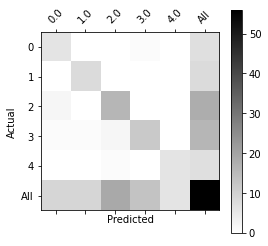

In [17]:
print(Y_test.shape)
print('           '+ label_to_emoji(0)+ '    ' + label_to_emoji(1) + '    ' +  label_to_emoji(2)+ '    ' + label_to_emoji(3)+'   ' + label_to_emoji(4))
print(pd.crosstab(Y_test, pred_test.reshape(56,), rownames=['Actual'], colnames=['Predicted'], margins=True))
plot_confusion_matrix(Y_test, pred_test)

<a name='2'></a>
## Emojifier-V2: Using LSTMs in Keras 

Build an LSTM model that takes word **sequences** as input! This model will be able to account for word ordering. 

Emojifier-V2 will continue to use pre-trained word embeddings to represent words. then feed word embeddings into an LSTM, and the LSTM will learn to predict the most appropriate emoji. 

In [18]:
import numpy as np
import tensorflow
np.random.seed(0)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, LSTM, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.initializers import glorot_uniform
np.random.seed(1)

<a name='2-1'></a>
### Model Overview


<img src="images/emojifier-v2.png" style="width:700px;height:400px;"> <br>
<caption><center><font color='purple'><b>Figure</b>: Emojifier-V2. A 2-layer LSTM sequence classifier. </center></caption>

In [19]:
def sentences_to_indices(X, word_to_index, max_len):
    """
    Converts an array of sentences (strings) into an array of indices corresponding to words in the sentences.
    The output shape should be such that it can be given to `Embedding()` (described in Figure 4). 
    
    Arguments:
    X -- array of sentences (strings), of shape (m, 1)
    word_to_index -- a dictionary containing the each word mapped to its index
    max_len -- maximum number of words in a sentence. You can assume every sentence in X is no longer than this. 
    
    Returns:
    X_indices -- array of indices corresponding to words in the sentences from X, of shape (m, max_len)
    """
    
    m = X.shape[0]                                   # number of training examples    
    X_indices = np.zeros((m,max_len))
    
    for i in range(m):                               # loop over training examples
        sentence_words = X[i].lower().split()
        j = 0
        for w in sentence_words:
            if w in word_to_index:
                X_indices[i, j] = word_to_index[w]
                j =  j + 1
    
    return X_indices

In [21]:
X1 = np.array(["funny lol", "lets play baseball", "food is ready for you"])
X1_indices = sentences_to_indices(X1, word_to_index, max_len=5)
print("X1 =", X1)
print("X1_indices =\n", X1_indices)

X1 = ['funny lol' 'lets play baseball' 'food is ready for you']
X1_indices =
 [[155338. 225108.      0.      0.      0.]
 [220916. 286359.  69714.      0.      0.]
 [151197. 192959. 302238. 151342. 394457.]]


In [22]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    """
    Creates a Keras Embedding() layer and loads in pre-trained GloVe 50-dimensional vectors.
    
    Arguments:
    word_to_vec_map -- dictionary mapping words to their GloVe vector representation.
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)

    Returns:
    embedding_layer -- pretrained layer Keras instance
    """
    
    vocab_size = len(word_to_index) + 1             
    any_word = list(word_to_vec_map.keys())[0]
    emb_dim = word_to_vec_map[any_word].shape[0]    
      
    emb_matrix = np.zeros((vocab_size, emb_dim))
    
    for word, idx in word_to_index.items():
        try:
            emb_matrix[idx, :] = word_to_vec_map[word]
        except:
            print(word)
    
    embedding_layer = Embedding(input_dim = vocab_size, output_dim = emb_dim)
    
    # Build the embedding layer, it is required before setting the weights of the embedding layer. 
    embedding_layer.build((None,))
    
    # Set the weights of the embedding layer
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

<a name='2-4'></a>
### Building the Emojifier-V2

Build the Emojifier-V2 model, in which  he embedding layer's output is fed to an LSTM network!

<img src="images/emojifier-v2.png" style="width:700px;height:400px;"> <br>
<caption><center><font color='purple'><b>Figure</b>: Emojifier-v2. A 2-layer LSTM sequence classifier. </center></caption></font> 


In [24]:
def Emojify_V2(input_shape, word_to_vec_map, word_to_index):
    """
    Function creating the Emojify-v2 model's graph.
    
    Arguments:
    input_shape -- shape of the input, usually (max_len,)
    word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)

    Returns:
    model -- a model instance in Keras
    """
    
    sentence_indices = Input(shape = input_shape, dtype = 'int32')
    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
    embeddings = embedding_layer(sentence_indices)
    X = LSTM(128,return_sequences = True)(embeddings)
    X = Dropout(0.5)(X)
    X = LSTM(128,return_sequences = False)(X)
    X = Dropout(0.5)(X)
    X = Dense(5)(X)
    X = Activation('softmax')(X)
    
    model = Model(sentence_indices,X)
    
    return model

In [26]:
model = Emojify_V2((maxLen,), word_to_vec_map, word_to_index)
model.summary()

benicأ
carnivأ
cesأ
fأ
gimnأ
grأ
gأ
jiأ
ngأ
pointe-أ
pont-أ
prأھt-أ
riviأ¨re-أ
rأ
sأ
thأ
toأ
tأ
vis-أ
xiأ
xأ
zhأ
ë²•ى
أ®le-أ
ؤ‘oأ
هگŒن¸­و›¸é–€ن¸‹ه¹³ç«
ي–‰ى
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 10, 50)            19998850  
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 128)           91648     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_3 (Dropout)          (

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
X_train_indices = sentences_to_indices(X_train, word_to_index, maxLen)
Y_train_oh = convert_to_one_hot(Y_train, C = 5)

In [29]:
model.fit(X_train_indices, Y_train_oh, epochs = 50, batch_size = 32, shuffle=True)

Epoch 1/50
5/5 [==============================] - 1s 270ms/step - loss: 1.5663 - accuracy: 0.2576
Epoch 2/50
5/5 [==============================] - 1s 269ms/step - loss: 1.4908 - accuracy: 0.3636
Epoch 3/50
5/5 [==============================] - 1s 272ms/step - loss: 1.4756 - accuracy: 0.3258
Epoch 4/50
5/5 [==============================] - 2s 315ms/step - loss: 1.3747 - accuracy: 0.3939
Epoch 5/50
5/5 [==============================] - 1s 277ms/step - loss: 1.2689 - accuracy: 0.5455
Epoch 6/50
5/5 [==============================] - 2s 386ms/step - loss: 1.1068 - accuracy: 0.5985
Epoch 7/50
5/5 [==============================] - 2s 325ms/step - loss: 0.9783 - accuracy: 0.6288
Epoch 8/50
5/5 [==============================] - 2s 332ms/step - loss: 0.8168 - accuracy: 0.7045
Epoch 9/50
5/5 [==============================] - 2s 451ms/step - loss: 0.7469 - accuracy: 0.7197
Epoch 10/50
5/5 [==============================] - 2s 481ms/step - loss: 0.6215 - accuracy: 0.7955
Epoch 11/50
5/5 [==

In [30]:
X_test_indices = sentences_to_indices(X_test, word_to_index, max_len = maxLen)
Y_test_oh = convert_to_one_hot(Y_test, C = 5)
loss, acc = model.evaluate(X_test_indices, Y_test_oh)
print()
print("Test accuracy = ", acc)

2/2 [==============================] - 0s 3ms/step - loss: 0.5199 - accuracy: 0.8036

Test accuracy =  0.8035714030265808


In [31]:
# This code allows you to see the mislabelled examples
C = 5
y_test_oh = np.eye(C)[Y_test.reshape(-1)]
X_test_indices = sentences_to_indices(X_test, word_to_index, maxLen)
pred = model.predict(X_test_indices)
for i in range(len(X_test)):
    x = X_test_indices
    num = np.argmax(pred[i])
    if(num != Y_test[i]):
        print('Expected emoji:'+ label_to_emoji(Y_test[i]) + ' prediction: '+ X_test[i] + label_to_emoji(num).strip())

Expected emoji:😄 prediction: she got me a nice present	❤️
Expected emoji:😞 prediction: work is hard	😄
Expected emoji:😞 prediction: This girl is messing with me	❤️
Expected emoji:😞 prediction: work is horrible	😄
Expected emoji:🍴 prediction: any suggestions for dinner	😄
Expected emoji:😄 prediction: you brighten my day	❤️
Expected emoji:😞 prediction: she is a bully	😄
Expected emoji:😄 prediction: will you be my valentine	❤️
Expected emoji:😄 prediction: dance with me	❤️
Expected emoji:😄 prediction: I like to laugh	❤️
Expected emoji:😞 prediction: go away	⚾


#### LSTM Version Accounts for Word Order
* The Emojify-V1 model did not "not feeling happy" correctly, but your implementation of Emojify-V2 got it right! 
    * If it didn't, be aware that Keras' outputs are slightly random each time, so this is probably why. 
* The current model still isn't very robust at understanding negation (such as "not happy")
    * This is because the training set is small and doesn't have a lot of examples of negation. 
    * If the training set were larger, the LSTM model would be much better than the Emojify-V1 model at understanding more complex sentences. 